<a href="https://colab.research.google.com/github/torchflash/MMAI831-AIOS-Assignment/blob/main/AI_on_the_spot(AIOS)_Assignment_Gurashish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importing libraries
import datetime
import pandas as pd
import numpy as np
import subprocess
import os

from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
##from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.model_selection import KFold, StratifiedKFold
##from sklearn.linear_model import LogisticRegression
##from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8')
#plt.style.use('Solarize_Light2')

Load, split data and eda

In [21]:
csv_url = "/content/drive/MyDrive/Colab Notebooks/AI in Marketing/MMM_Store sales.csv"
df = pd.read_csv(csv_url)
df = df.drop(df.columns[0], axis = 1)

df.dropna(inplace = True)

df.fillna(0, inplace = True)

df["store"].fillna(df["store"].mean(), inplace = True)
df["billboard"].fillna(df["billboard"].mean(), inplace = True)
df["printout"].fillna(df["printout"].mean(), inplace = True)
df["sat"].fillna(df["sat"].mean(), inplace = True)
df["comp"].fillna(df["comp"].mean(), inplace = True)
df["price"].fillna(df["price"].mean(), inplace = True)
df["sales"].fillna(df["sales"].mean(), inplace = True)
df.fillna(method='ffill', inplace=True)

In [22]:
seed = 42
sales_train_df, sales_test_df = train_test_split(df,test_size = 0.25, random_state= seed)

print(f"Length of sales train = {len(sales_train_df)}")
print(f"Length of sales test = {len(sales_test_df)}")
print(f"Split = {len(sales_test_df)/len(df)*100}%")
  

Length of sales train = 750
Length of sales test = 250
Split = 25.0%


In [23]:
sales_train_df

,store,billboard,printout,sat,comp,price,sales
82,1656,1074,693,69,931,93,17022.74793
991,1775,1084,853,65,457,97,16735.91408
789,1961,1137,367,74,737,99,21907.37388
894,1904,985,474,65,798,88,17377.57092
398,2003,656,923,71,704,105,14277.05517
...,...,...,...,...,...,...,...
106,1775,1164,601,72,741,92,20119.79590
270,1923,590,832,71,752,107,11513.32661
860,1868,880,766,66,982,96,16802.64631
435,2401,872,1387,68,792,101,18278.74176


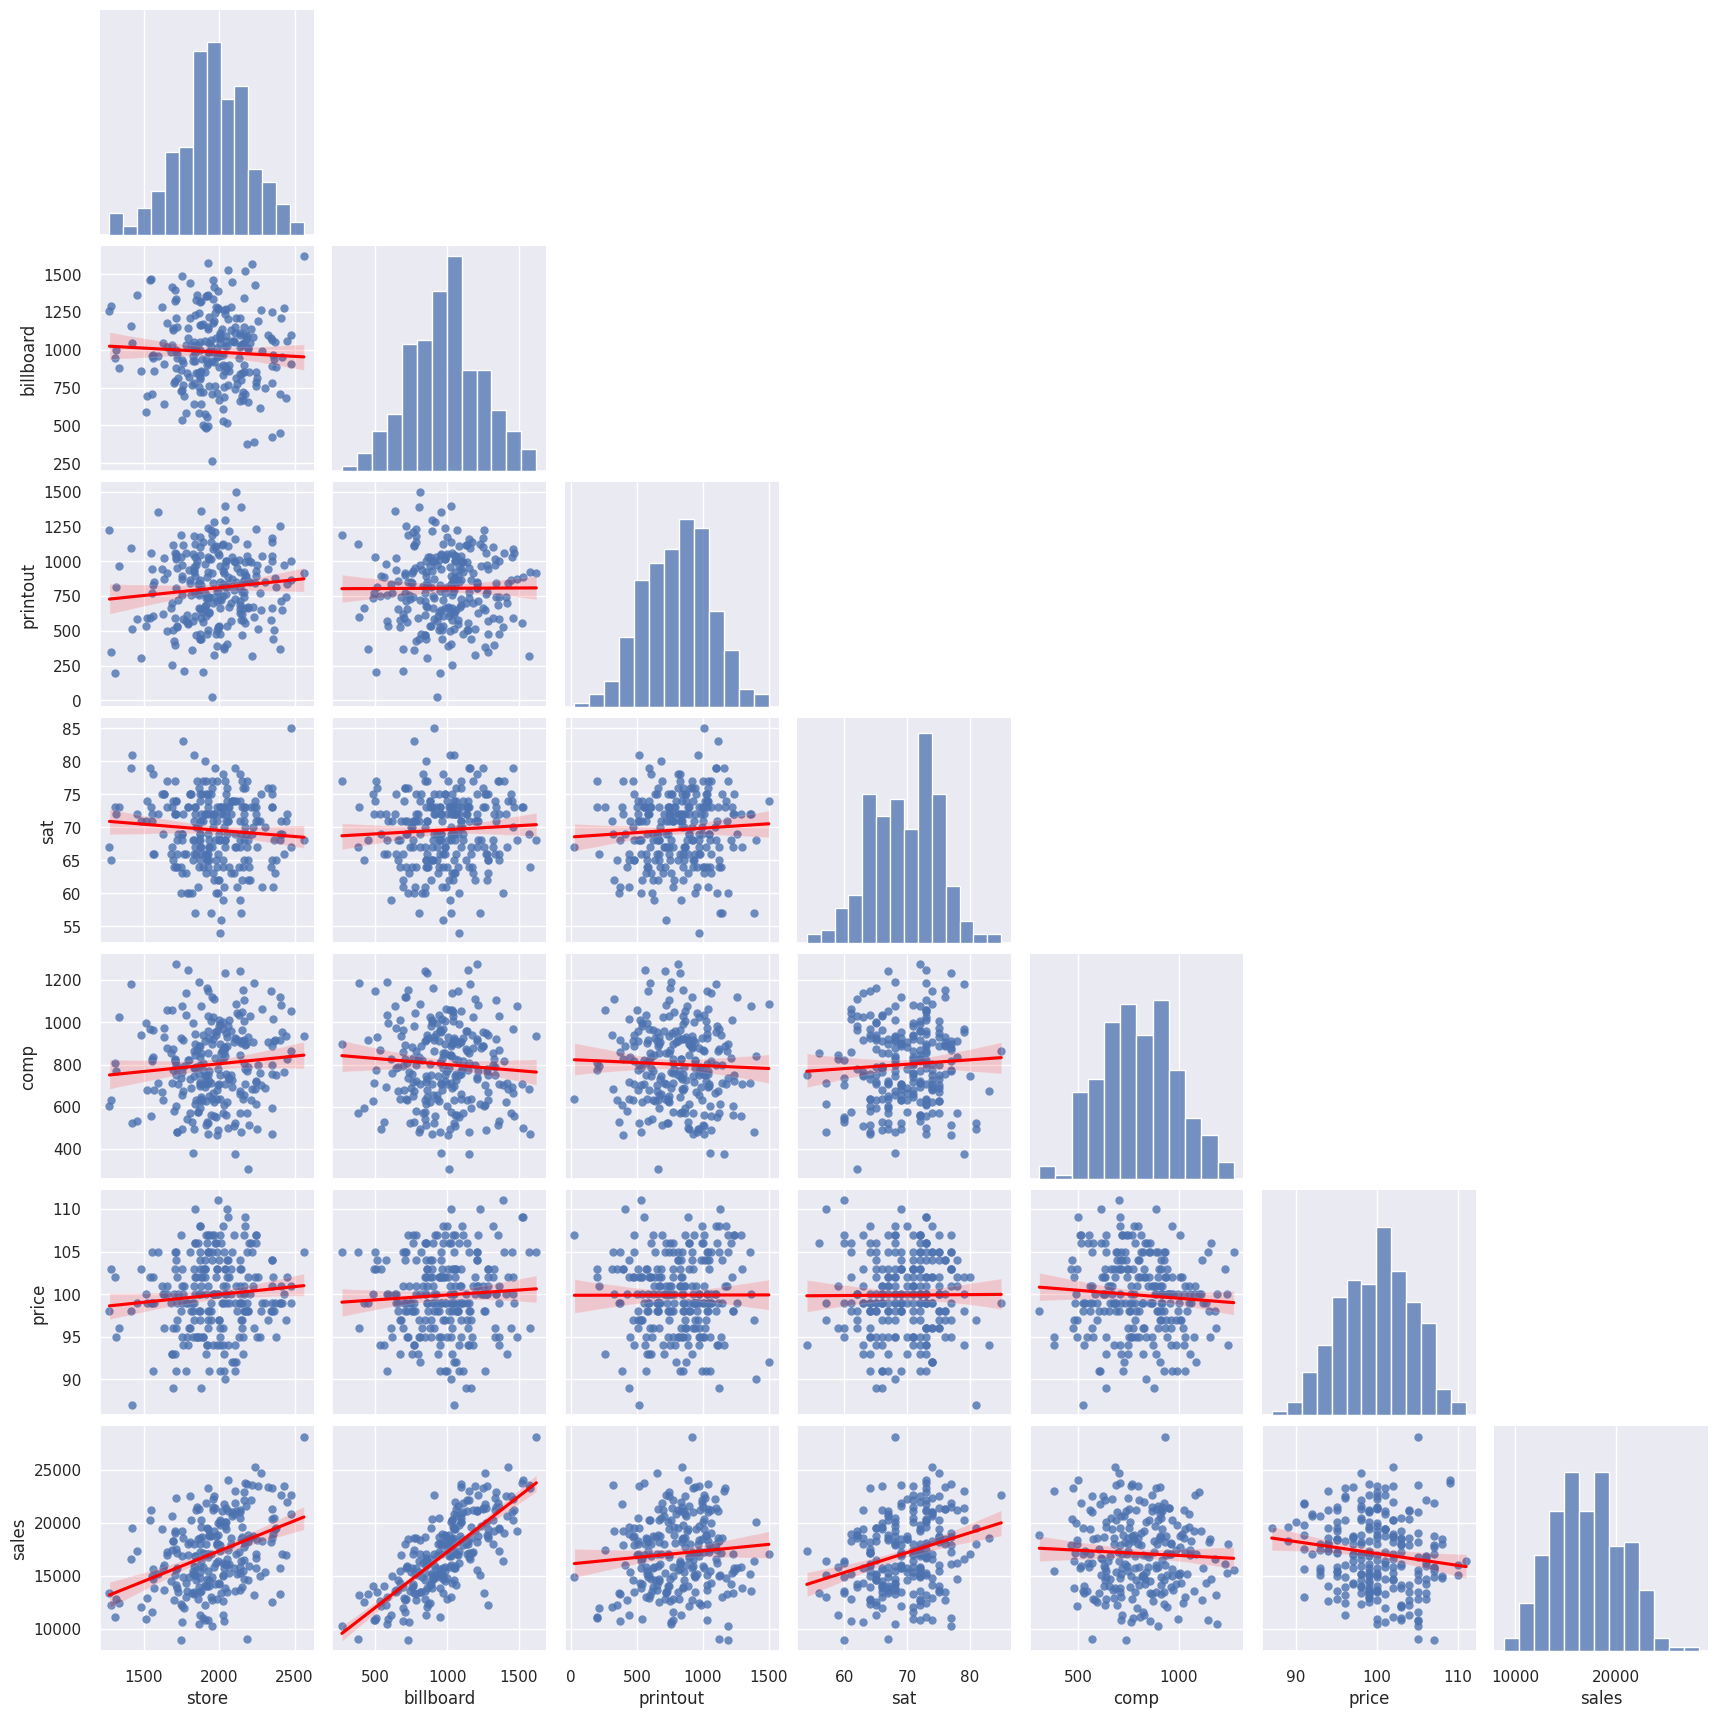

In [14]:
sns.set(rc={'figure.figsize':(2,2)})
sns.pairplot(data=sales_test_df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})
     

Correlation 

<Axes: >

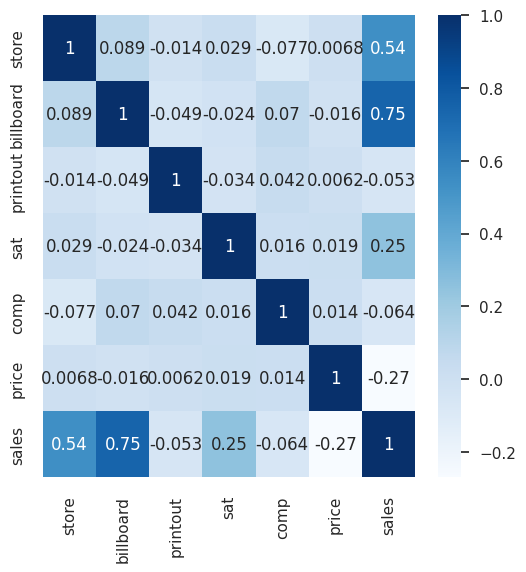

In [15]:
#Lets check if there are any linear correlations between the variables on the data set
correlation_df = sales_train_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_df, annot = True, cmap='Blues')

In [16]:
print(sales_test_df.columns)

Index(['store', 'billboard', 'printout', 'sat', 'comp', 'price', 'sales'], dtype='object')


In [27]:
#Setting up X and Y

X_train = sales_train_df[["store","billboard","printout","sat","comp","price","sales"]]

Y_train = sales_train_df["sales"]

X_test = sales_test_df[["store","billboard","printout","sat","comp", "price","sales"]]

Y_test = sales_test_df["sales"]

Linear Regression



In [32]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

#fitting the model on the training data

linear_reg.fit(X_train,Y_train)

#Making predictions on the test data

linear_predictions = linear_reg.predict(X_test)


In [44]:
#Results

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Calculating evaluation metrics

mae = np.mean(np.abs(Y_test - linear_predictions))
r2 = linear_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, linear_predictions)
rmse = np.sqrt(mse)
mapd = np.mean(np.abs((Y_test - linear_predictions) / Y_test)) * 100
aic = len(Y_test) * np.log(mse) + 2 * len(linear_reg.coef_)
bic = len(Y_test) * np.log(mse) + len(linear_reg.coef_) * np.log(len(Y_test))



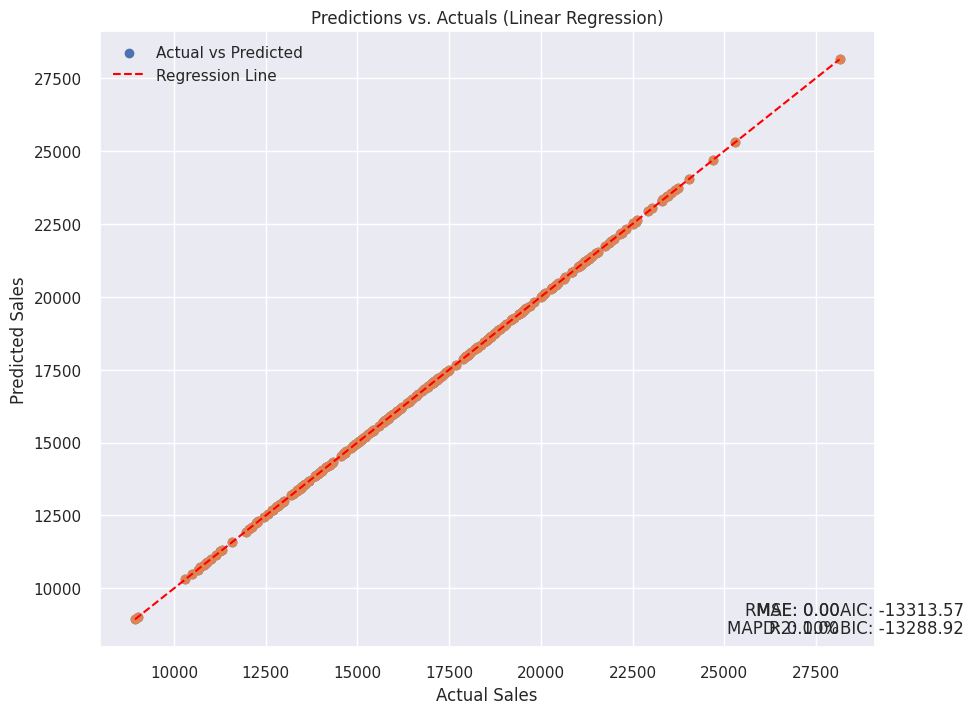

In [50]:
#Visualizing predictions vs actuals

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize =(10,8))
plt.scatter(Y_test, linear_predictions, label ="Actual vs Predicted")

#Adding a regression line

plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], color ="red", linestyle ="--", label = "Regression Line")

# Plotting Predictions vs. Actuals
plt.scatter(Y_test, linear_predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predictions vs. Actuals (Linear Regression)")

#Annotating evaluatin metrics
plt.text(Y_test.max(), Y_test.min(), f"MAE: {mae:.2f}", ha='right', va='bottom')
plt.text(Y_test.max(), Y_test.min(), f"R2: {r2:.2f}", ha='right', va='top')
plt.text(Y_test.max(), Y_test.min(), f"RMSE: {rmse:.2f}", ha='right', va='bottom')
plt.text(Y_test.max(), Y_test.min(), f"MAPD: {mapd:.2f}%", ha='right', va='top')
plt.text(Y_test.max(), Y_test.min(), f"AIC: {aic:.2f}", ha='left', va='bottom')
plt.text(Y_test.max(), Y_test.min(), f"BIC: {bic:.2f}", ha='left', va='top')


plt.legend()
plt.show()
